In [18]:
import os, time
from scipy import stats
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [19]:
# Create timestamp to show when this summary was run
print 'Summary run: ' + time.strftime("%a, %d %b %Y %H:%M")

Summary run: Thu, 03 Oct 2019 11:53


In [20]:
relative_path = '../../../outputs'
pd.options.display.float_format = '{:0,.0f}'.format

# Traffic Counts
----
### By Facility Type

In [21]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

In [22]:
_df = df.groupby('@facilitytype').sum()[['observed','modeled']]
_df.ix['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
display(_df)

,observed,modeled,diff
@facilitytype,,,
Freeway,"18,913,757","19,761,577","847,820"
HOV,"12,100,909","12,416,676","315,767"
Principal Arterial,"139,789","160,341","20,552"
Ramp,"121,917","182,975","61,058"
Total,"31,276,372","32,521,569","1,245,197"


----
### By County

In [23]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume_county_facility.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

_df = df.groupby('county').sum()[['observed','modeled']]
_df.ix['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df

,observed,modeled,diff
county,,,
King,"22,997,770","23,673,301","675,531"
Pierce,"3,240,267","3,750,234","509,967"
Snohomish,"5,038,335","5,098,034","59,699"
Total,"31,276,372","32,521,569","1,245,197"


----
### Scatterplots 

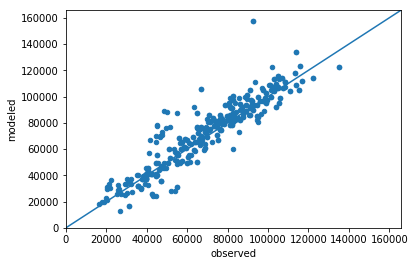

In [24]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [25]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print 'r^2: ' + str(r_value)

r^2: 0.920465541611


---
By County

King r^2: 0.93916366905
Pierce r^2: 0.592396171278
Snohomish r^2: 0.981394642346


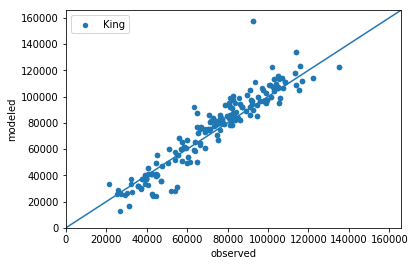

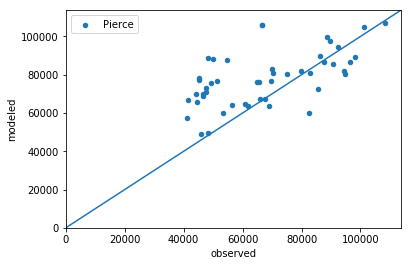

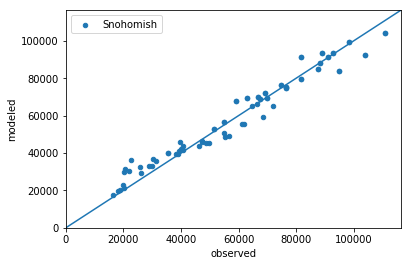

In [26]:
for county in np.unique(df['county']):
    _df = df[df['county'] == county]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=county)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    print str(county) + ' r^2: ' + str(r_value)

---
By Facility Type

r^2 Freeway: 0.907529078469
r^2 Principal Arterial: 0.810787490442


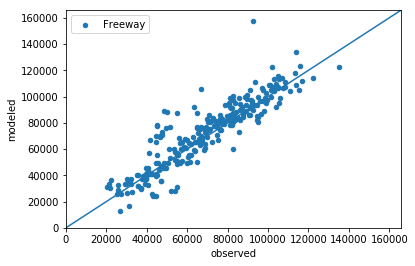

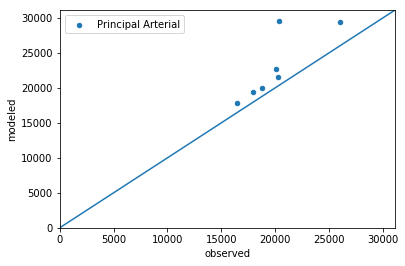

In [27]:
for factype in ['Freeway','Principal Arterial']:
    _df = df[df['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print 'r^2 ' + str(factype) + ': ' + str(r_value)

# Screenlines

In [28]:
df = pd.read_csv(os.path.join(relative_path,'validation','screenlines.csv'))

r^2 : 0.992248041751


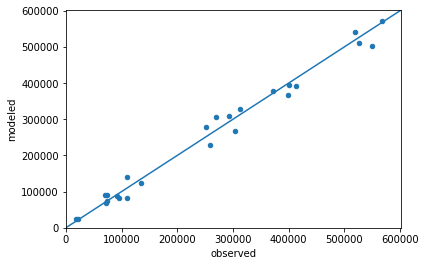

In [29]:
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print 'r^2 : ' + str(r_value)

# Transit Boarding
----
### By Agency

In [30]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_agency.csv', index_col='agency_name')
df[['observed','modeled','diff']] = df[['observed','modeled','diff']].astype('float')
df.drop('perc_diff', axis=1, inplace=True)
df.sort_values('observed', ascending=False)

,observed,modeled,diff
agency_name,,,
King County Metro,"421,902","482,158","60,256"
Sound Transit,"159,193","128,739","-30,454"
Community Transit,"32,480","37,109","4,629"
Pierce Transit,"28,597","41,976","13,379"
Washington Ferries,"18,287","2,685","-15,602"
Kitsap Transit,"8,922","14,260","5,338"
Everett Transit,"3,558","2,262","-1,296"


----
### Key Routes

In [31]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed','modeled']] = df[['observed','modeled']].astype('float')
df = df.drop('perc_diff',axis=1)
df.sort_values('observed', ascending=False)

,agency_name,observed,modeled,diff
description,,,,
LightRail SeaTac-Sea,Sound Transit,"77,498","48,599","-28,899"
E-Line E-Line Rapid*,King County Metro,"17,389","20,518","3,129"
COMMTR RL TAC-SEA,Sound Transit,"16,359","1,979","-14,380"
D Line D-Line Rapid*,King County Metro,"14,493","14,226",-267
40 CBD-NGTC via Fre*,King County Metro,"12,440","14,605","2,165"
C Line C-Line Rapid*,King County Metro,"12,429","13,948","1,519"
7 Route 7,King County Metro,"11,309","10,904",-405
A Line A-Line Rapid*,King County Metro,"10,168","9,400",-768
550 Bellevue-Seattle,Sound Transit,"9,738","14,945","5,207"


---
### Lines by Agency

r^2 Community Transit: 0.88400814429
r^2 Everett Transit: -0.329659258661
r^2 King County Metro: 0.944784012198
r^2 Kitsap Transit: 0.0012270259262
r^2 Pierce Transit: 0.930583004822
r^2 Sound Transit: 0.942933147493
r^2 Washington Ferries: 0.697392507993


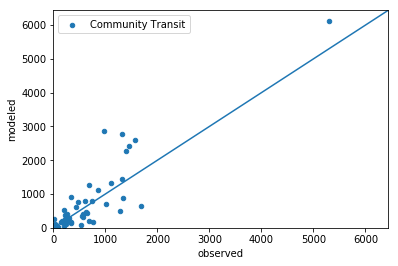

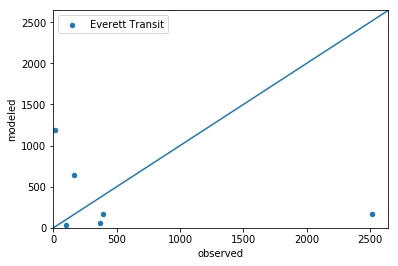

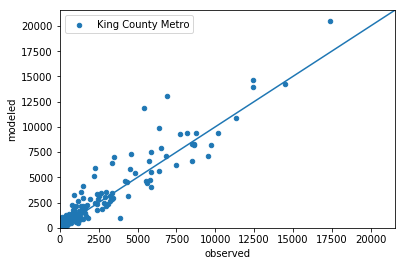

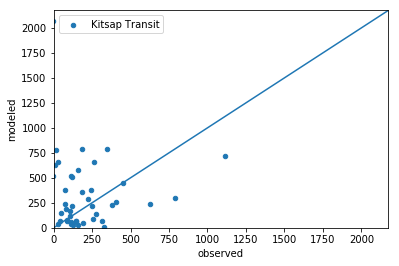

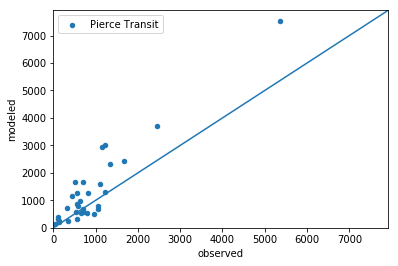

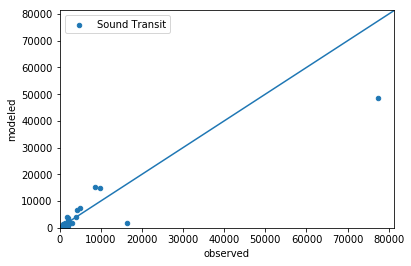

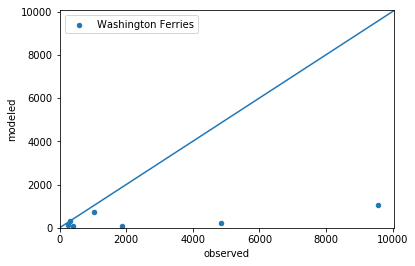

In [32]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_line.csv', index_col='agency_name')
df = df[-df['agency_id'].isnull()]

for agency in np.unique(df.index):
    _df = df.ix[agency,:]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=agency)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print 'r^2 ' + str(agency) + ': ' + str(r_value)

# Light Rail Station Boardings
----
Red Line

In [33]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_boardings.csv', index_col='station_name')
df

,observed,modeled
station_name,,
Husky Stadium,"10,517","6,345"
Westlake,"12,179","7,154"
University St,"5,872","5,294"
Pioneer Square,"4,317","3,194"
Int'l District,"6,308","2,452"
Capitol Hill,"7,837","6,002"
Stadium,"2,136",511
SODO,"2,354","2,566"
Beacon Hill,"2,890","1,255"


# Stop Transfers

### Light Rail

In [35]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_transfers.csv', index_col='station_name')
pd.options.display.float_format = '{:0,.2f}'.format
df

,modeled_transfer_rate,observed_transfer_rate,diff,percent_diff
station_name,,,,
Husky Stadium,0.22,nan,nan,nan
Westlake,0.39,0.36,0.02,0.06
University St,0.60,0.20,0.40,2.01
Pioneer Square,0.59,0.16,0.43,2.71
Int'l District,0.72,0.45,0.27,0.61
Capitol Hill,0.07,nan,nan,nan
Stadium,0.44,0.12,0.32,2.68
SODO,0.51,0.31,0.20,0.64
Beacon Hill,0.36,0.35,0.01,0.02
